Меняем текущую директорию

In [68]:
import os
os.chdir("C:/Users/Nikita/Desktop/6 сем/АМ/git/Marketing-main/data")

Посмотрим на данные

In [21]:
from pandas import read_csv
filename = 'forestfires.csv'
names = ['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
data = read_csv(filename,names=names)
peek = data.head(10)
print(peek)

   X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
0  X  Y  month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
1  7  5    mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7     0     0
2  7  4    oct  tue  90.6   35.4  669.1   6.7    18  33   0.9     0     0
3  7  4    oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3     0     0
4  8  6    mar  fri  91.7   33.3   77.5     9   8.3  97     4   0.2     0
5  8  6    mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8     0     0
6  8  6    aug  sun  92.3   85.3    488  14.7  22.2  29   5.4     0     0
7  8  6    aug  mon  92.3   88.9  495.6   8.5  24.1  27   3.1     0     0
8  8  6    aug  mon  91.5  145.4  608.2  10.7     8  86   2.2     0     0
9  8  6    sep  tue    91  129.5  692.6     7  13.1  63   5.4     0     0


В таблице представлены все 13 атрибутов

Размерность данных

In [22]:
data.shape

(518, 13)

Таблица имеет выборку из 518 элементов, каждый из которых состоит из 13 атрибутов.

Типы данных

In [23]:
data.dtypes

X        object
Y        object
month    object
day      object
FFMC     object
DMC      object
DC       object
ISI      object
temp     object
RH       object
wind     object
rain     object
area     object
dtype: object

Описательные статистики

In [24]:
data.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,518,518,518,518,518,518,518,518,518,518,518,518,518
unique,10,8,13,8,107,216,220,120,193,76,22,8,252
top,4,4,aug,sun,91.6,99,745.3,9.6,17.4,27,2.2,0,0
freq,91,203,184,95,28,10,10,23,8,33,53,509,247


В данной таблцие можно узнать количество уникальных значений, самое часто встречаемое и их частоту 

Распределение данных по классам

In [26]:
data.groupby('month').size()

month
apr        9
aug      184
dec        9
feb       20
jan        2
jul       32
jun       17
mar       54
may        2
month      1
nov        1
oct       15
sep      172
dtype: int64

Здесь представлена частота по месяцам

Корреляция между признаками

In [59]:
from pandas import set_option
set_option('display.width',100) 
set_option('precision',4)
data = data.apply(lambda x: x.factorize()[0])
data.corr(method='pearson')
correlations = data.corr(method='pearson')
correlations

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.0000,0.1408,-0.0005,0.0098,-0.0309,-0.0309,-0.0182,0.0140,0.0884,-0.0356,-0.0113,-0.0805,-0.0181
Y,0.1408,1.0000,0.0845,0.0018,-0.0849,-0.0565,-0.0265,-0.0415,-0.0332,-0.0563,0.0451,-0.0340,-0.0280
month,-0.0005,0.0845,1.0000,-0.0197,0.2628,0.1867,0.2429,0.1446,0.1448,0.1365,0.0543,-0.0357,0.1291
day,0.0098,0.0018,-0.0197,1.0000,0.0646,0.0592,0.0340,0.0417,0.1135,0.0027,-0.0786,-0.0916,0.0087
FFMC,-0.0309,-0.0849,0.2628,0.0646,1.0000,0.5890,0.6159,0.5474,0.3108,0.1648,0.0436,0.1175,0.3011
DMC,-0.0309,-0.0565,0.1867,0.0592,0.5890,1.0000,0.9330,0.6407,0.3893,0.2374,0.0863,0.1704,0.4977
DC,-0.0182,-0.0265,0.2429,0.0340,0.6159,0.9330,1.0000,0.6935,0.4000,0.2690,0.0864,0.1688,0.5059
ISI,0.0140,-0.0415,0.1446,0.0417,0.5474,0.6407,0.6935,1.0000,0.3109,0.1187,0.0070,0.0363,0.3683
temp,0.0884,-0.0332,0.1448,0.1135,0.3108,0.3893,0.4000,0.3109,1.0000,0.1151,0.0374,0.0782,0.3390
RH,-0.0356,-0.0563,0.1365,0.0027,0.1648,0.2374,0.2690,0.1187,0.1151,1.0000,0.1013,0.1991,0.1262


Т.к. были столбцы, содержащие нечисловые значения, пришлось представить их в виде числовых.
Корреляция представлена по 13 атрибутам.

Асиметрия одномерных распределений

In [60]:
data.skew()

X        0.2253
Y        0.8151
month    1.2417
day      0.1049
FFMC     0.6384
DMC      0.1887
DC       0.1936
ISI      0.5819
temp     0.3137
RH       0.5603
wind     0.2997
rain     9.9803
area     0.9192
dtype: float64

Большинство значений близки к 0 -> много симметричных распределений. 
Т.к. присутсвует большое положительное число, то есть распределение с правым хвостом больших значений.

Univariate Plots (одномерные графики распределений).
Histograms (гистограммы)

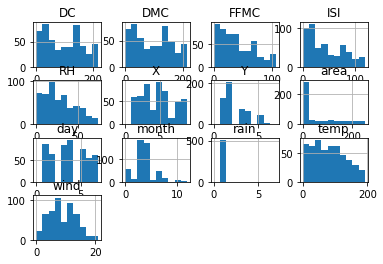

In [69]:
from matplotlib import pyplot
data.hist()
pyplot.show()

Density Plots (ядерные оценки плотности)

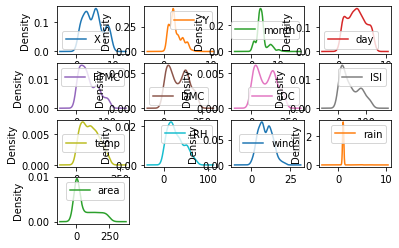

In [70]:
data.plot(kind='density',subplots=True,layout=(4,4),sharex=False,sharey=False)
pyplot.show()

Ядерные оценки позволяют увидеть сглаженные гистограммы

Box and Whisker Plots (ящики с усами)

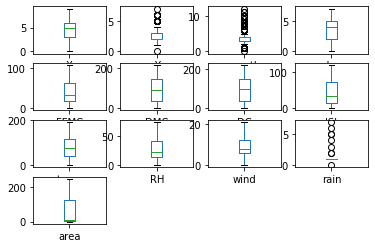

In [65]:
data.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)
pyplot.show()

Опять выделяются 3 и 12 атрибуты (имеют наибольшее отклонение при проверке асиметрии)

Correlation Matrix Plot (коррелограмма)

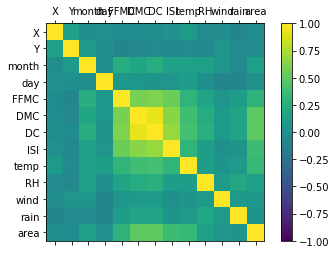

In [66]:
import numpy
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations,vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

Ближе к средней положительной связи

Scatter Plot Matrix (диаграмма рассеяния)

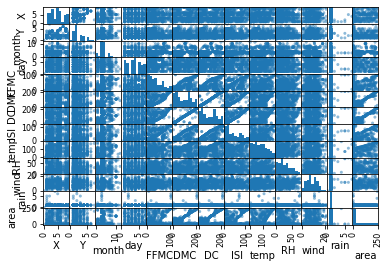

In [71]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
pyplot.show()